## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Self-Organizing Maps

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [4]:
def som(X, gridLength, h, maxIteration, minPercentChange):
    K = gridLength ** 2
    (N, dim) = X.shape
    # Initialize centers
    c = np.random.rand(K, dim) * 0.1
    J_old = np.inf
    means = np.zeros ([K,dim])
    count = np.zeros (K)
    for t in range(maxIteration):
        dist = np.zeros([N, K])
        for j in range(K):
            cj = np.array(c[j, :], ndmin=2)
            cj_repeated = np.repeat(cj, N, axis=0)
            d = X - cj_repeated
            d **= 2
            d = np.sum(d, axis=1)
            dist[:, j] = d
        S = np.argmin(dist, axis=1)
        J = 0
        for i in range(K):
            for j in range(K):
                idx = (S == j)
                J += h(i,j) * np.sum(dist[idx, i])        
        J = np.sum (dist[range(N),S])
        print ('SOM objective function:   ', J)
        if (J_old - J < minPercentChange * J_old):
            break
        J_old = J
        if t != maxIteration - 1:
            for j in range(K):
                index = (S == j)
                Xj = X[index, :]
                count[j] =  Xj.shape[0]
                if (count[j] > 0):
                    means[j,:] = np.mean(Xj, axis=0)
                else:
                    means[j,:] = 0

            for i in range(K):
                num = np.zeros(dim)
                denum = 0
                for j in range(K):
                    num += h(i,j) * count[j] * means[j,:]
                    denum += h(i,j) * count[j] 
                if (denum != 0):
                    c[i, :] = num / denum
    return (c, S)

In [71]:
idx = MnistTrainY.squeeze() != 100
XTrain = MnistTrainX[idx,:]

In [72]:
gridLength = 10
def h(i,j):
    xi = i // gridLength
    yi = i % gridLength
    xj = j // gridLength
    yj = j % gridLength
    d2 = (xi - xj) ** 2 + (yi - yj) ** 2
    nbhd = np.exp (-0.5 * d2)
    return nbhd

In [73]:
maxIteration = 100
minPercentChange = 0.001
(c,S) = som(XTrain, gridLength, h, maxIteration, minPercentChange)


VQ objective function:    4730874.565312822

VQ objective function:    2664436.552475044

VQ objective function:    2258428.3920309804

VQ objective function:    2149173.751862659

VQ objective function:    2110555.728516809

VQ objective function:    2093700.4839763816

VQ objective function:    2085751.8315222012

VQ objective function:    2082066.6719482357

VQ objective function:    2079829.266040433

VQ objective function:    2078092.2592395006


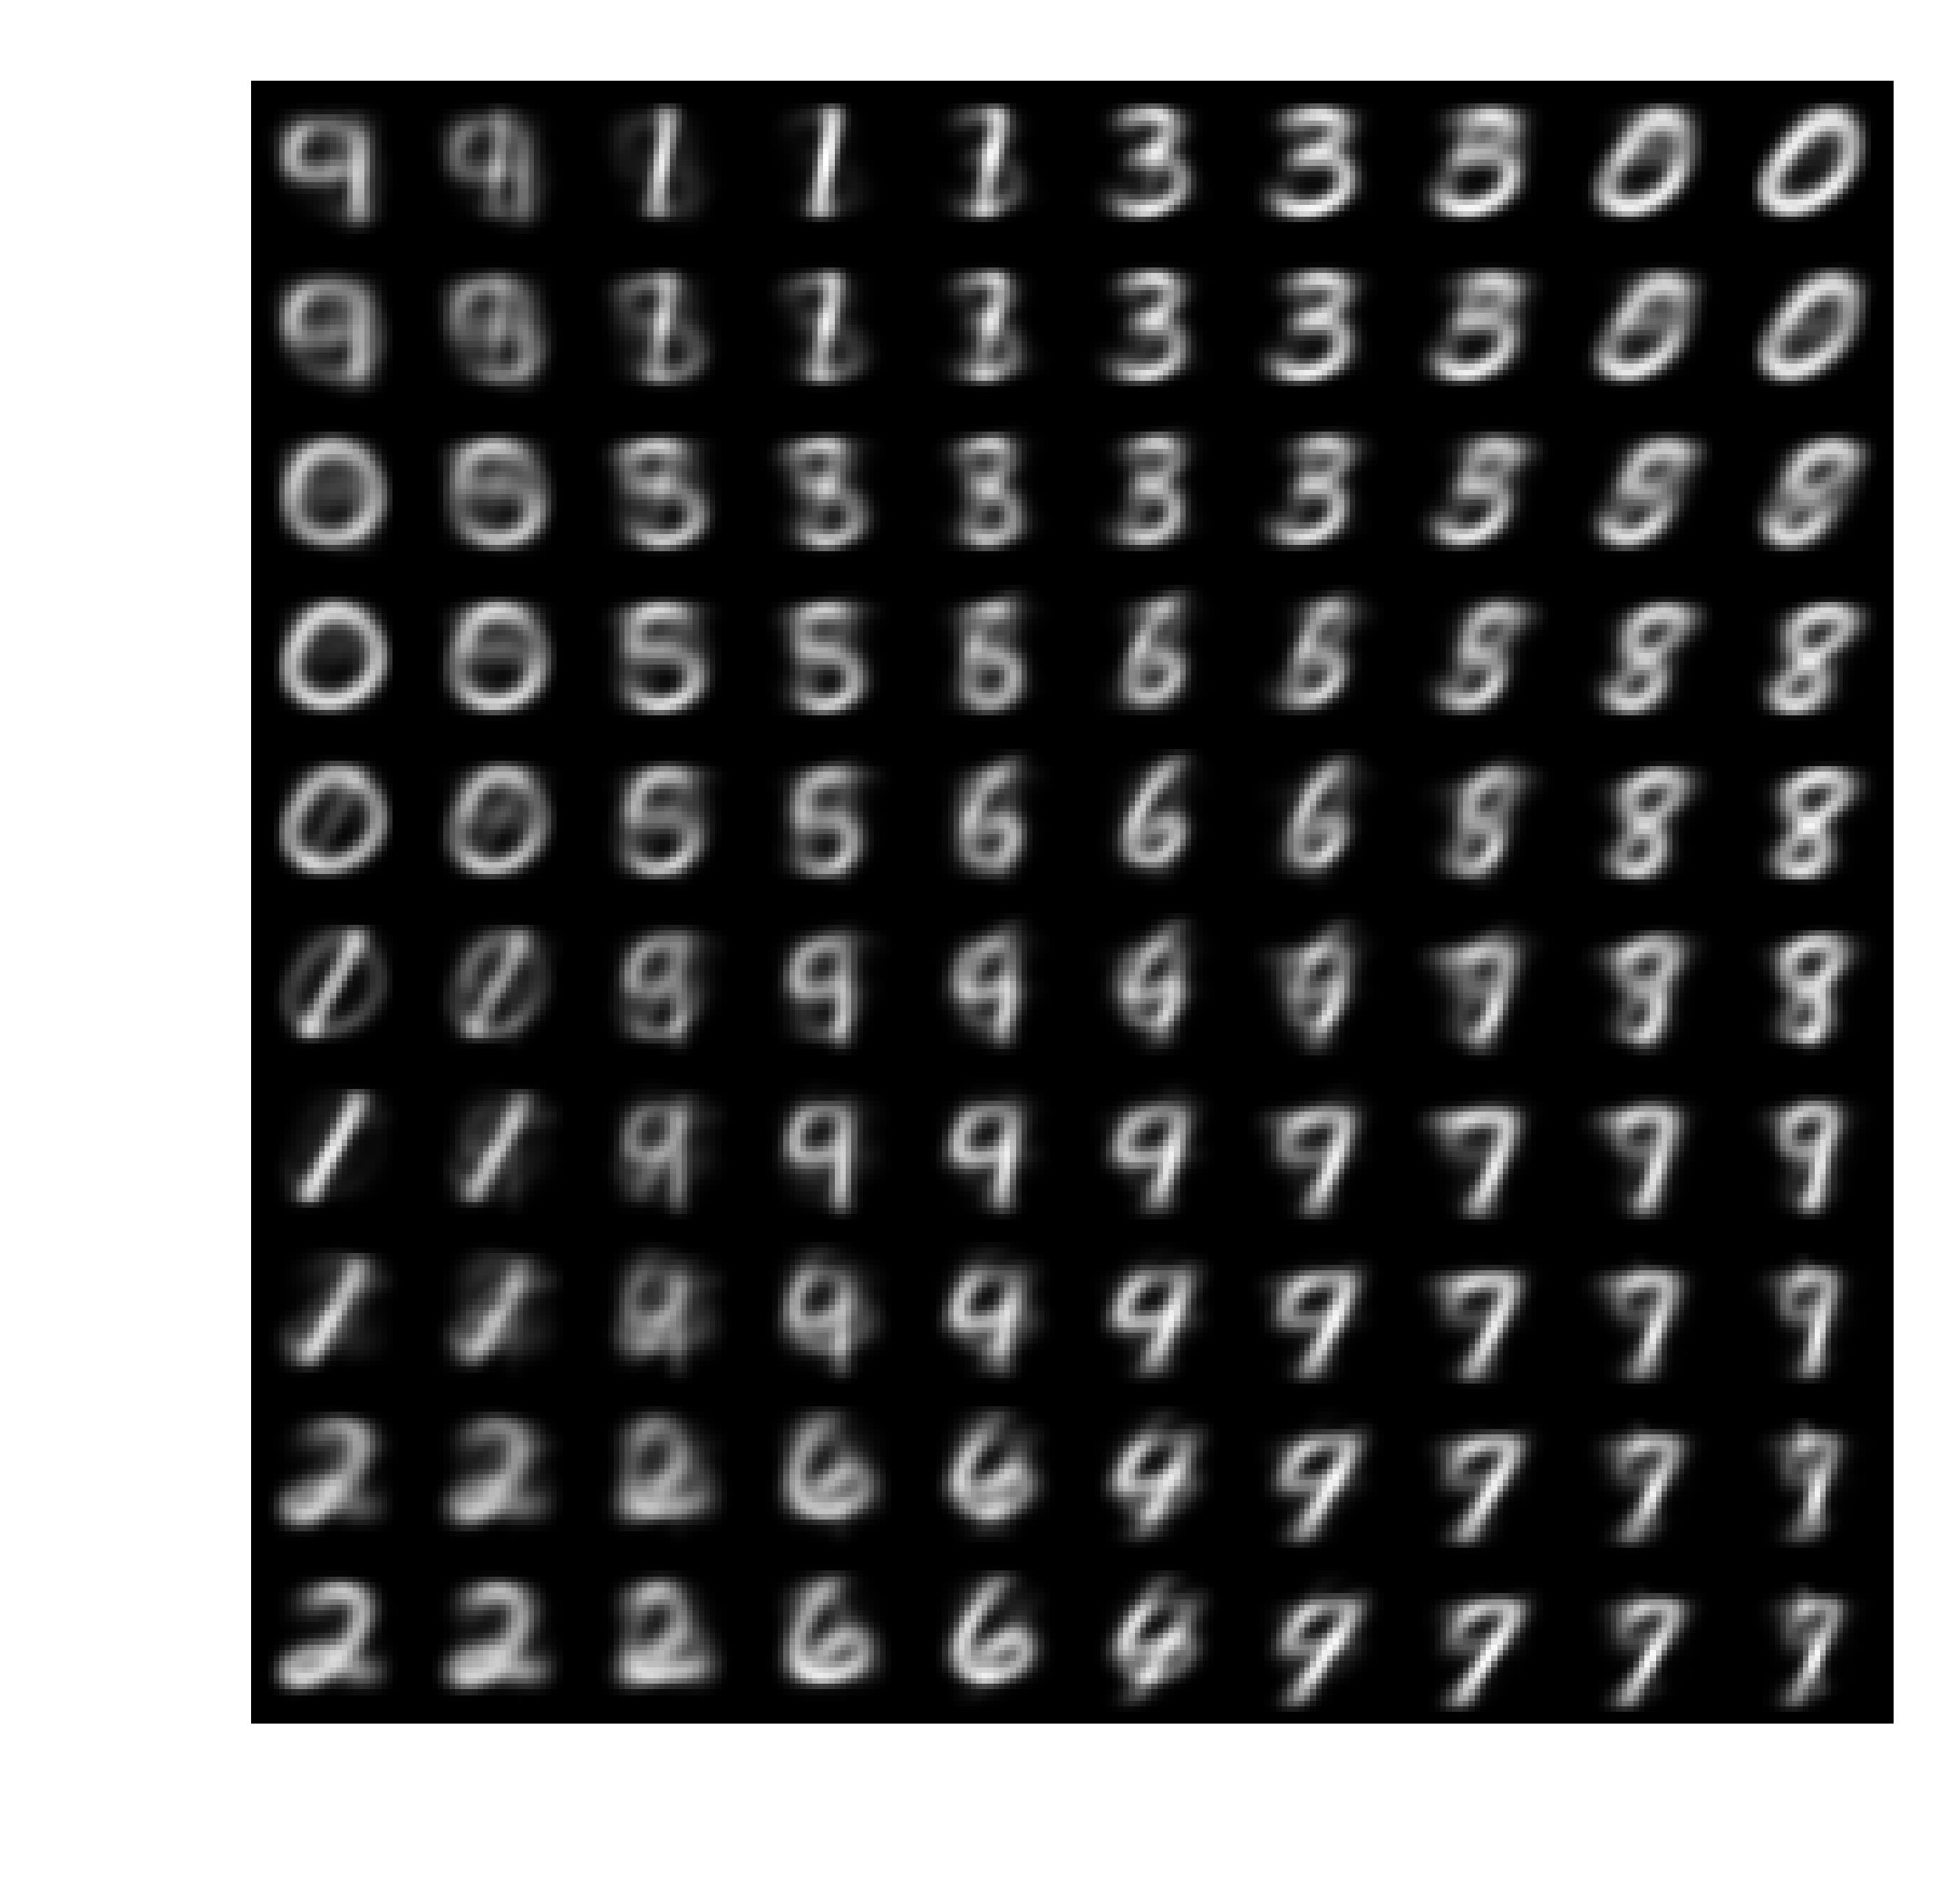

In [74]:
K = gridLength** 2
L = int(np.sqrt(K-1)+1)
img = np.zeros([L*29,L*29])
for i in range (L):
    for j in range (L):
        k = i * L + j
        if (k < K):
            img[i*29:i*29+28, j*29:j*29+28] = np.reshape(c[k,:], [28,28])

imh = plt.imshow (img, cmap='gray');
plt.axis('off')
plt.show()

In [77]:
plt.imsave ('som.png', img, cmap='gray');